In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load dataset from local file
df = pd.read_csv('/content/1_boston_housing.csv')

In [ ]:
# Split features and target variable
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Feature scaling using MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Model checkpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# Train the model with validation split and callbacks
history = model.fit(X_train, y_train, epochs=50, validation_split=0.05, verbose=1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 542.2203 - mae: 21.2928

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 585.7049 - mae: 22.3291 - val_loss: 609.5143 - val_mae: 22.7627
Epoch 2/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - loss: 514.9846 - mae: 21.0805

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 537.1046 - mae: 21.3908 - val_loss: 562.3021 - val_mae: 21.6647
Epoch 3/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 552.2961 - mae: 21.6959

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 517.8217 - mae: 20.7038 - val_loss: 488.9441 - val_mae: 19.8343
Epoch 4/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 398.9856 - mae: 18.3392

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 425.8347 - mae: 18.3231 - val_loss: 384.7627 - val_mae: 16.8727
Epoch 5/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 283.8413 - mae: 14.1559

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 321.7489 - mae: 14.9833 - val_loss: 263.9364 - val_mae: 12.9447
Epoch 6/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 223.6343 - mae: 13.2394

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 207.4604 - mae: 11.7570 - val_loss: 167.5406 - val_mae: 9.1055
Epoch 7/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 140.2170 - mae: 9.4916

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 151.2879 - mae: 9.6215 - val_loss: 130.7438 - val_mae: 8.1658
Epoch 8/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 150.8399 - mae: 9.1939

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 132.0386 - mae: 8.8735 - val_loss: 120.8669 - val_mae: 7.8485
Epoch 9/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 118.8468 - mae: 8.8973

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 125.4866 - mae: 8.7053 - val_loss: 113.0629 - val_mae: 7.5228
Epoch 10/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 62.4880 - mae: 6.4610

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 101.4882 - mae: 7.5136 - val_loss: 106.5632 - val_mae: 7.2056
Epoch 11/50
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 96.1349 - mae: 7.2750  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 95.4122 - mae: 7.2481 - val_loss: 98.8311 - val_mae: 6.8332
Epoch 12/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 77.6294 - mae: 6.0850

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 80.4561 - mae: 6.5099 - val_loss: 91.4074 - val_mae: 6.5334
Epoch 13/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 72.9545 - mae: 6.6248

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 82.0346 - mae: 6.6679 - val_loss: 86.0611 - val_mae: 6.2383
Epoch 14/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 37.9764 - mae: 4.6697

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 62.5934 - mae: 5.7162 - val_loss: 80.1006 - val_mae: 6.1232
Epoch 15/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 45.7406 - mae: 5.5003

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 53.5665 - mae: 5.3866 - val_loss: 77.2823 - val_mae: 5.9279
Epoch 16/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 42.2950 - mae: 5.0992

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.3926 - mae: 5.1363 - val_loss: 73.1342 - val_mae: 5.9749
Epoch 17/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 40.2622 - mae: 4.5950

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 48.3626 - mae: 4.9523 - val_loss: 70.1395 - val_mae: 6.0113
Epoch 18/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 45.5877 - mae: 4.8996

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 48.6113 - mae: 4.9675 - val_loss: 68.8477 - val_mae: 5.7749
Epoch 19/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25.1735 - mae: 3.6986

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.9900 - mae: 4.5115 - val_loss: 67.5697 - val_mae: 5.6171
Epoch 20/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 40.7943 - mae: 4.5428

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.9451 - mae: 4.6517 - val_loss: 63.6361 - val_mae: 5.8563
Epoch 21/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.9590 - mae: 4.7669 - val_loss: 63.9342 - val_mae: 5.4420
Epoch 22/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.5796 - mae: 4.2374

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 45.1444 - mae: 4.6172 - val_loss: 61.1763 - val_mae: 5.4669
Epoch 23/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 44.9879 - mae: 5.0240

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.2990 - mae: 4.4437 - val_loss: 59.4861 - val_mae: 5.3927
Epoch 24/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 29.9219 - mae: 4.4041

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.6047 - mae: 4.2773 - val_loss: 57.0729 - val_mae: 5.4014
Epoch 25/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.3543 - mae: 4.2326  

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 35.6140 - mae: 4.2314 - val_loss: 55.9222 - val_mae: 5.2469
Epoch 26/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 29.4307 - mae: 3.9948

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.0785 - mae: 3.9429 - val_loss: 54.6619 - val_mae: 5.1260
Epoch 27/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 34.0760 - mae: 4.3378

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 29.9868 - mae: 3.9081 - val_loss: 51.8235 - val_mae: 5.1356
Epoch 28/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.4962 - mae: 4.1050  

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 36.5212 - mae: 4.0777 - val_loss: 50.9218 - val_mae: 4.9829
Epoch 29/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 19.1749 - mae: 3.3658

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.8696 - mae: 3.7940 - val_loss: 49.8782 - val_mae: 4.9267
Epoch 30/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31.9113 - mae: 4.5735

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28.0449 - mae: 3.8641 - val_loss: 46.9525 - val_mae: 4.9238
Epoch 31/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 20.4970 - mae: 3.4524

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.8957 - mae: 3.6827 - val_loss: 46.9254 - val_mae: 4.8777
Epoch 32/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.5913 - mae: 3.3287 - val_loss: 47.2769 - val_mae: 4.8149
Epoch 33/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5782 - mae: 2.4580

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.0940 - mae: 3.1746 - val_loss: 43.4930 - val_mae: 4.8224
Epoch 34/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.2919 - mae: 3.6552 - val_loss: 44.3682 - val_mae: 4.7483
Epoch 35/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.0711 - mae: 3.4026 - val_loss: 44.4477 - val_mae: 4.6915
Epoch 36/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 21.5784 - mae: 3.4596

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.3692 - mae: 3.2284 - val_loss: 40.9260 - val_mae: 4.7002
Epoch 37/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.9019 - mae: 3.4241 - val_loss: 42.5536 - val_mae: 4.6173
Epoch 38/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.5538 - mae: 3.2415 - val_loss: 41.4227 - val_mae: 4.5731
Epoch 39/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 15.2594 - mae: 2.8924

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.6560 - mae: 3.1696 - val_loss: 40.3351 - val_mae: 4.5206
Epoch 40/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.9852 - mae: 2.7468

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.9042 - mae: 2.9132 - val_loss: 40.0678 - val_mae: 4.4796
Epoch 41/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.7747 - mae: 2.6762

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.7416 - mae: 2.9726 - val_loss: 38.1413 - val_mae: 4.4436
Epoch 42/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.5760 - mae: 3.2485 - val_loss: 40.4794 - val_mae: 4.3421
Epoch 43/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 40.9951 - mae: 3.7669

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.4720 - mae: 3.1853 - val_loss: 37.8961 - val_mae: 4.3050
Epoch 44/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1182 - mae: 2.3051

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.3423 - mae: 3.0485 - val_loss: 37.2083 - val_mae: 4.2484
Epoch 45/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8957 - mae: 2.7934 - val_loss: 37.9633 - val_mae: 4.1902
Epoch 46/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 17.2042 - mae: 3.2289

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.6594 - mae: 2.9661 - val_loss: 36.5066 - val_mae: 4.1651
Epoch 47/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.7306 - mae: 3.1142 - val_loss: 37.1627 - val_mae: 4.1188
Epoch 48/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.9656 - mae: 2.3436

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.4295 - mae: 2.8456 - val_loss: 35.9498 - val_mae: 4.0666
Epoch 49/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 39.0470 - mae: 3.8584

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.4901 - mae: 3.1535 - val_loss: 35.4596 - val_mae: 4.0279
Epoch 50/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.7179 - mae: 2.9408

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.3861 - mae: 2.7263 - val_loss: 35.2548 - val_mae: 3.9910


In [ ]:
# Evaluate the model on the test set
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.8031 - mae: 3.6900 
Mean squared error on test data:  25.42768669128418
Mean absolute error on test data:  3.3640975952148438


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# Convert y_test and y_pred to 1D arrays for comparison
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

In [ ]:
# Print first 10 predictions vs actual values
print("\nFirst 10 Predictions vs Actual:")
for true, pred in zip(y_test_flat[:10], y_pred_flat[:10]):
    print(f"Actual: {float(true):.2f}, Predicted: {float(pred):.2f}")


First 10 Predictions vs Actual:
Actual: 15.00, Predicted: 11.92
Actual: 26.60, Predicted: 27.49
Actual: 45.40, Predicted: 40.70
Actual: 20.80, Predicted: 15.93
Actual: 34.90, Predicted: 30.78
Actual: 21.90, Predicted: 38.68
Actual: 28.70, Predicted: 26.93
Actual: 7.20, Predicted: 9.28
Actual: 20.00, Predicted: 14.59
Actual: 32.20, Predicted: 31.45


In [ ]:
# Compute R² score
r2 = r2_score(y_test_flat, y_pred_flat)
print(f"\nR² Score on Test Data: {r2:.4f}")


R² Score on Test Data: 0.6854


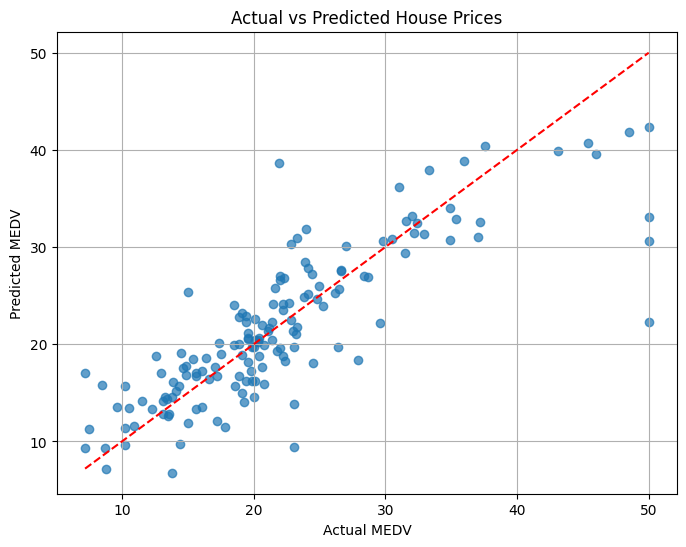

In [ ]:
# Plot Actual vs Predicted House Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.7)
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

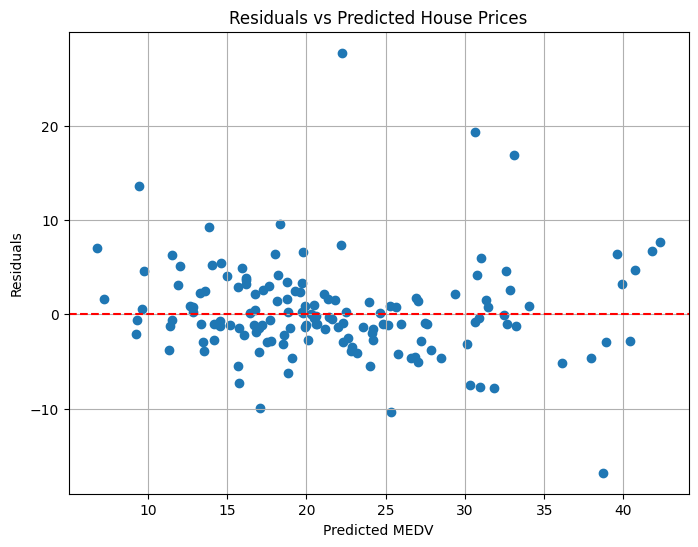

In [ ]:
# Plot Residuals vs Predicted House Prices
residuals = y_test_flat - y_pred_flat
plt.figure(figsize=(8,6))
plt.scatter(y_pred_flat, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted House Prices')
plt.grid(True)
plt.show()